## Read Data


In [180]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.multiclass import OneVsRestClassifier

In [181]:
path = '/content/drive/MyDrive/Colab Notebooks/CS512/hw_3/Sensorless_drive_diagnosis.txt'

In [182]:
data = pd.read_csv(path,delim_whitespace=True, header=None)

data = data.rename({48: 'target'}, axis = 1)

In [183]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,target
count,58509.000000,5.850900e+04,5.850900e+04,58509.000000,5.850900e+04,5.850900e+04,58509.000000,58509.000000,58509.000000,58509.000000,...,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000
mean,-0.000003,1.439648e-06,1.412013e-06,-0.000001,1.351239e-06,-2.654483e-07,0.001915,0.001913,0.001912,-0.011897,...,-0.397757,7.293781,8.273772,-1.500887,-1.500912,-1.500805,-1.497771,-1.497794,-1.497686,6.000000
std,0.000072,5.555429e-05,2.353009e-04,0.000063,5.660943e-05,2.261907e-04,0.036468,0.036465,0.036470,0.066482,...,25.018728,12.451781,6.565952,0.003657,0.003668,0.003632,0.003163,0.003163,0.003175,3.162305
min,-0.013721,-5.414400e-03,-1.358000e-02,-0.012787,-8.355900e-03,-9.741300e-03,-0.139890,-0.135940,-0.130860,-0.218640,...,-0.902350,-0.596830,0.320660,-1.525500,-1.526200,-1.523700,-1.521400,-1.523200,-1.521300,1.000000
25%,-0.000007,-1.444400e-05,-7.239600e-05,-0.000005,-1.475300e-05,-7.379100e-05,-0.019927,-0.019951,-0.019925,-0.032144,...,-0.715470,1.450300,4.436300,-1.503300,-1.503400,-1.503200,-1.499600,-1.499600,-1.499500,3.000000
50%,-0.000003,8.804600e-07,5.137700e-07,-0.000001,7.540200e-07,-1.659300e-07,0.013226,0.013230,0.013247,-0.015566,...,-0.661710,3.301300,6.479100,-1.500300,-1.500300,-1.500300,-1.498100,-1.498100,-1.498000,6.000000
75%,0.000002,1.877700e-05,7.520000e-05,0.000004,1.906200e-05,7.138600e-05,0.024770,0.024776,0.024777,0.020614,...,-0.573980,8.288500,9.857500,-1.498200,-1.498200,-1.498200,-1.496200,-1.496300,-1.496200,9.000000
max,0.005784,4.525300e-03,5.237700e-03,0.001453,8.245100e-04,2.753600e-03,0.069125,0.069130,0.069131,0.352580,...,3670.800000,889.930000,153.150000,-1.457600,-1.456100,-1.455500,-1.337200,-1.337200,-1.337100,11.000000


In [184]:
data['target'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [185]:
data

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,target
0,-3.014600e-07,8.260300e-06,-0.000012,-0.000002,-1.438600e-06,-0.000021,0.031718,0.031710,0.031721,-0.032963,...,-0.63308,2.9646,8.1198,-1.4961,-1.4961,-1.4961,-1.4996,-1.4996,-1.4996,1
1,2.913200e-06,-5.247700e-06,0.000003,-0.000006,2.778900e-06,-0.000004,0.030804,0.030810,0.030806,-0.033520,...,-0.59314,7.6252,6.1690,-1.4967,-1.4967,-1.4967,-1.5005,-1.5005,-1.5005,1
2,-2.951700e-06,-3.184000e-06,-0.000016,-0.000001,-1.575300e-06,0.000017,0.032877,0.032880,0.032896,-0.029834,...,-0.63252,2.7784,5.3017,-1.4983,-1.4983,-1.4982,-1.4985,-1.4985,-1.4985,1
3,-1.322600e-06,8.820100e-06,-0.000016,-0.000005,-7.282900e-07,0.000004,0.029410,0.029401,0.029417,-0.030156,...,-0.62289,6.5534,6.2606,-1.4963,-1.4963,-1.4963,-1.4975,-1.4975,-1.4976,1
4,-6.836600e-08,5.666300e-07,-0.000026,-0.000006,-7.940600e-07,0.000013,0.030119,0.030119,0.030145,-0.031393,...,-0.63010,4.5155,9.5231,-1.4958,-1.4958,-1.4958,-1.4959,-1.4959,-1.4959,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58504,-9.982500e-06,1.854900e-06,-0.000021,0.000021,-5.910200e-06,-0.000098,-0.083417,-0.083419,-0.083398,-0.182340,...,-0.52907,1.4641,7.0032,-1.5024,-1.5025,-1.5023,-1.4933,-1.4933,-1.4933,11
58505,-1.055400e-05,1.983500e-05,0.000031,-0.000018,-1.061600e-04,0.000292,-0.085131,-0.085151,-0.085182,-0.184320,...,-0.51971,3.3275,2.3072,-1.5024,-1.5025,-1.5024,-1.4925,-1.4925,-1.4926,11
58506,-5.857700e-06,1.859400e-05,-0.000102,-0.000003,3.827500e-06,0.000117,-0.081989,-0.082008,-0.081906,-0.186140,...,-0.51103,20.9250,9.0437,-1.5035,-1.5035,-1.5039,-1.4911,-1.4912,-1.4910,11
58507,-4.441100e-06,3.396900e-05,-0.000442,0.000005,6.500800e-06,0.000087,-0.081500,-0.081534,-0.081093,-0.183630,...,-0.52033,1.3890,10.7430,-1.5029,-1.5029,-1.5030,-1.4932,-1.4932,-1.4931,11


## Question 1 and 2

In [75]:
X = data.drop(['target'],axis = 1)
y = data["target"]

In [76]:
np.random.seed(42)
#a training set (60%), a validation set (20%), and a testing set (20%)

X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

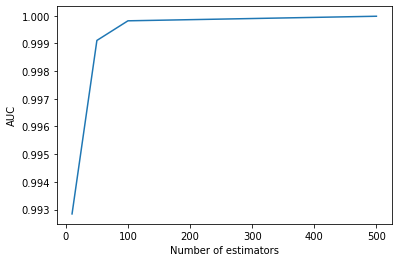

In [83]:
aucs_list = [] #to store AUC values

learn_rate = 0.1 # First set the learning rate to a high value, for example, 0.1

#Try values [10, 50, 100, 500]
for n_estimators in [10, 50, 100, 500]:
    model = xgb.XGBClassifier(learning_rate=learn_rate, n_estimators=n_estimators)  # Build model with current number of estimators
    model.fit(X_train, y_train) #Fit the model
    y_validation_pred = model.predict(X_val) #predictions on the validation set 
    pred_proba = model.predict_proba(X_val)
    auc = roc_auc_score(y_val, pred_proba, average ="micro", multi_class="ovr") #AUC for the validation set
    aucs_list.append(auc) # this should have four values inside of it

plt.plot([10, 50, 100, 500], aucs_list)
plt.xlabel('estimators')
plt.ylabel('AUC score')
plt.show()

In [179]:
aucs_list

[0.9928430424007851,
 0.9991070077844084,
 0.9998160516437933,
 0.9999810014552406]

In [87]:
#The results show that 100 is where it peaks. Hence, it can be selected as the optimal choice for number of decision trees
n_estimator = 100

## Question 3

In [88]:
# Next with these parameters, tune the max depth: the maximum depth of each tree. Try values
# [4, 6, 8]. Report the best value for the max depth

for max_depth in [4, 6, 8]:
    model = xgb.XGBClassifier(learning_rate=learn_rate, n_estimators=n_estimator, max_depth=max_depth)
    model.fit(X_train, y_train)
    y_validation_pred = model.predict(X_val)
    pred_proba = model.predict_proba(X_val) # probabilities
    auc = roc_auc_score(y_val, pred_proba, average ="micro", multi_class="ovr") #AUC score
    print(f'Max depth: {max_depth}, AUC: {auc}') # print score for each depth

# For max depth it seems that 8 is better

Max depth: 4, AUC: 0.9999402702578044
Max depth: 6, AUC: 0.9999831688783973
Max depth: 8, AUC: 0.9999919649066733


## Question 4 and AUC curve

In [91]:
# Now come pack and tune the learning rate. Try values of [0.001, 0.01, 0.1]

for lr in [0.001, 0.01, 0.1]:
    model = xgb.XGBClassifier(learning_rate=lr, n_estimators=n_estimator, max_depth=8)# n_estimator is 100 and depth is 8
    model.fit(X_train, y_train)
    y_validation_pred = model.predict(X_val)
    pred_proba = model.predict_proba(X_val)
    auc = roc_auc_score(y_val, pred_proba,average ="micro", multi_class="ovr")
    print(f'Learning rate: {lr}, AUC: {auc}')

# For Learning rate it seems that 0.1 is better

Learning rate: 0.001, AUC: 0.9992039196416473
Learning rate: 0.01, AUC: 0.9998032077629035
Learning rate: 0.1, AUC: 0.9999919649066733


In [ ]:
#These are dataframes, converting them now to make array shape
X_test = X_test.values
X_test
y_test = y_test.values

In [139]:
#Once you select your hyperparameters, combine the train and the validation data, retrain the model and report the test AUC. And plot the ROC curve
X_train_val = np.concatenate([X_train, X_val], axis=0)
y_train_val = np.concatenate([y_train, y_val], axis=0)

le = LabelEncoder() # Somehow I got errors despite target data is already encoded, this fixed the issue
le.fit(y_train_val)
y_train_val_encoded = le.transform(y_train_val)
y_test_encoded = le.transform(y_test)

final = xgb.XGBClassifier(learning_rate=0.1, n_estimators=n_estimator, max_depth=8) # final model uses the best hyperparameters
final.fit(X_train_val, y_train_val_encoded)

y_test_pred = final.predict_proba(X_test) #predictions on the test set

test_auc = roc_auc_score(y_test_encoded, y_test_pred,average ="micro", multi_class="ovr") # Compute AUC on the test set

print(f'Test AUC: {test_auc}')

Test AUC: 0.9999913237349983


In [168]:
test_auc = roc_auc_score(y_test_encoded, y_test_pred,average ="micro", multi_class="ovr")


In [171]:
y_test_pred.shape

(11702, 11)

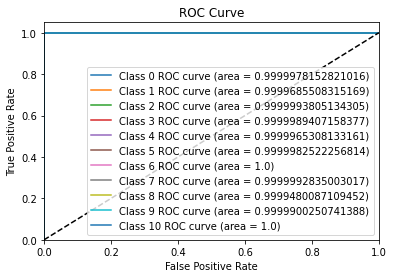

In [178]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

n_classes = len(np.unique(y_train_val_encoded)) # the number of classes. I did this to compute roc score and curve for ach class by for loop
fpr_list = []
tpr_list = []
thresholds_list = []

for i in range(n_classes): #the ROC curve for each class
    fpr, tpr, thresholds = roc_curve(y_test_encoded, y_test_pred[:, i], pos_label=i)
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    thresholds_list.append(thresholds)

for i in range(n_classes):
    plt.plot(fpr_list[i], tpr_list[i], label=f'Class {i} ROC curve (area = {roc_auc_score(y_test_encoded == i, y_test_pred[:, i])})') #the ROC curve for each class

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()